In [ ]:
!pip install -q -U 'tensorflow-text==2.8.*'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 51.6 MB/s eta 0:00:00


In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import re
import time
import unicodedata
import datetime
import pathlib
import json

from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras import layers

import tensorflow_hub as hub
import tensorflow_models as tfm

import tensorflow_text as text
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

In [ ]:
tf.get_logger().setLevel('ERROR')
tf.config.run_functions_eagerly(True)

## Parametri BERT

In [ ]:
bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'  
tfhub_handle_encoder =  'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
gs_folder_bert = 'gs://cloud-tpu-checkpoints/bert/v3/uncased_L-12_H-768_A-12'
vocab = os.path.join(gs_folder_bert, 'vocab.txt')

print('BERT model selected                : ', tfhub_handle_encoder)
print('Preprocessing model auto-selected  : ', tfhub_handle_preprocess)
print('BERT vocab                         : ', vocab)

BERT model selected                :  https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocessing model auto-selected  :  https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
BERT vocab                         :  gs://cloud-tpu-checkpoints/bert/v3/uncased_L-12_H-768_A-12/vocab.txt


In [ ]:
bert_model_name = 'distilbert_multi_cased_L-6_H-768_A-12/1'  
tfhub_handle_preprocess = 'https://tfhub.dev/jeongukjae/distilbert_multi_cased_preprocess/2'
tfhub_handle_encoder =  'https://tfhub.dev/jeongukjae/distilbert_multi_cased_L-6_H-768_A-12/1'


print('BERT model name                    : ', bert_model_name)
print('BERT model selected                : ', tfhub_handle_encoder)
print('BERT preprocess                    : ', tfhub_handle_preprocess)

BERT model name                    :  distilbert_multi_cased_L-6_H-768_A-12/1
BERT model selected                :  https://tfhub.dev/jeongukjae/distilbert_multi_cased_L-6_H-768_A-12/1
BERT preprocess                    :  https://tfhub.dev/jeongukjae/distilbert_multi_cased_preprocess/2


### Variabili Globali

In [ ]:
# PARAMETRI GLOBALI
root_folder = 'drive/MyDrive/BERT/'

# DATI
data_folder_name = 'data/'
train_filename = 'Traduzioni/inglese-italiano.tsv'
data_filename = 'train_data.csv'

DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))
train_filenamepath = os.path.abspath(os.path.join(DATA_PATH, train_filename))
data_filenamepath = os.path.abspath(os.path.join(DATA_PATH, data_filename))

# PATH LOG Tensorboard
PATH_LOG = 'logs/fit/transformer_bert'
PATH_LOG = os.path.abspath(os.path.join(root_folder, PATH_LOG))
log_dir =  os.path.abspath(os.path.join(PATH_LOG, datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))) 
log_history = os.path.abspath(os.path.join(PATH_LOG, 'histrory.json'))

# PATH WEIGHTS Tensorboard
PATH_WEIGHTS = 'weights/transformer_bert'
PATH_WEIGHTS = os.path.abspath(os.path.join(root_folder, PATH_WEIGHTS))
checkpoint_path = os.path.abspath(os.path.join(PATH_WEIGHTS, 'cp.ckpt'))

# VOCABOLARIO
vocab_folder = 'vocab'
en_vocab_finalname = 'en_vocab_custom.txt'
it_vocab_finalname = 'it_vocab_custom.txt'

VOCAB_PATH = os.path.abspath(os.path.join(root_folder, vocab_folder))
en_vocab_filenamepath = os.path.abspath(os.path.join(VOCAB_PATH, en_vocab_finalname))
it_vocab_filenamepath = os.path.abspath(os.path.join(VOCAB_PATH, it_vocab_finalname))

In [ ]:
# parametri per il modello
INPUT_COLUMN = 'INPUT'
TARGET_COLUMN = 'TARGET'

# parametri per il modello
NUM_SAMPLES = 100000 
TRAIN = 17984
VALIDATION = 4160
N_VALIDATION = 1
TEST = 128

MAX_VOCAB_SIZE = 20000 
EMBEDDING_DIM = 64 
HIDDEN_DIM = 1024 # numero di celle nei layer ricorrenti nascosti

BATCH_SIZE = 32
BUFFER_SIZE = 2000
MAX_SEQ_LENGTH = 128

NUM_LAYERS = 1 # Numero di layer di Encoder e Decoder del Transformer
NUM_HEADS = 8 # Numero di meccanismi di multi-head attention
FF_DIM = 16 # Numero di celle dei Layer Feed Forward
DROPUOT = 0.5

# Ottimizzatore Adam
LEARNING_RATE_ADAM = 1e-4
BETA_1 = 0.66
BETA_2 = 0.999
EPOCHS_ADAM = 20

# IMPOSTO IL DEBUG A TRUE 
debug = True
training = True

## DATASET

### Caricamento Dati

In [ ]:
exist_data_file = Path(data_filenamepath)

if not exist_data_file.exists():
  # Caricamento dataset: frasi in inglese, frasi in italiano
  df = pd.read_csv(
      train_filenamepath,
      sep="\t",
      header=None,
      names=[INPUT_COLUMN, TARGET_COLUMN],
      usecols=[1,3],
      nrows=NUM_SAMPLES
  )

  df = df[-(TRAIN+VALIDATION+TEST):].reset_index(drop=True)

  # Mischio il dataset in modo che sia più uniforme tra train e test
  df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)

  print(df.iloc[-4:], '\n')

  df.to_csv(data_filenamepath, header=True, index=False, sep='|', columns=[INPUT_COLUMN, TARGET_COLUMN])

In [ ]:
df = pd.read_csv(
    data_filenamepath,
    sep='|'
)

print(df.iloc[-4:], '\n')

# Preprocessing dei dati di Input
input_data = df[INPUT_COLUMN].tolist()

# Preprocessing dei dati Target con aggiunta del token di fine frase
target_data = df[TARGET_COLUMN].tolist()

train_input_data = input_data[:TRAIN]
train_target_data = target_data[:TRAIN]

validation_input_data = input_data[TRAIN:TRAIN+VALIDATION]
validation_target_data = target_data[TRAIN:TRAIN+VALIDATION]

test_input_data = input_data[TRAIN+VALIDATION:]
test_target_data = target_data[TRAIN+VALIDATION:]

print('-----------TRAIN SET--------------')
print(train_input_data[-4:])
print(train_target_data[-4:])
print('-----------VALIDATION SET---------------')
print(validation_input_data[-4:])
print(validation_target_data[-4:])
print('-----------TEST SET---------------')
print(test_input_data[-4:])
print(test_target_data[-4:])

                                                   INPUT  \
99996               He is a teacher apart from the rest.   
99997                         We have six lessons a day.   
99998  It took about five minutes to get to my uncle'...   
99999                                    I own this car.   

                                                  TARGET  
99996              Lui è un insegnante fuori dal comune.  
99997                     Abbiamo sei lezioni al giorno.  
99998  Per arrivare dalla stazione a casa di mio zio ...  
99999                          Possiedo questa macchina.   

-----------TRAIN SET--------------
['Tom did the right thing.', 'Please write with a pencil.', 'His house is near the subway.', 'The medicine tastes bitter.']
['Tom ha fatto la cosa giusta.', 'Per piacere scrivete con una matita.', 'La sua casa è vicina alla stazione della metropolitana.', 'La medicina ha un gusto amaro.']
-----------VALIDATION SET---------------
['I hope karma bites you in the ass!

### Analisi Dati

In [ ]:
print(f'Esempi nel Dataset di Train                            : {len(train_input_data)}')
print(f'Frase più corta in inglese nel Dataset di Train        : {min(train_input_data, key = len)}')
print(f'Frase più corta in italiano nel Dataset di Train       : {min(train_target_data, key = len)}')
print(f'Frase più lunga in inglese nel Dataset di Train        : {max(train_input_data, key = len)}')
print(f'Frase più lunga in italiano nel Dataset di Train       : {max(train_target_data, key = len)}')
print('---------------------------------------------------------------------------------------')
print(f'Esempi nel Dataset di Validation                       : {len(validation_input_data)}')
print(f'Frase più corta in inglese nel Dataset di Validation   : {min(validation_input_data, key = len)}')
print(f'Frase più corta in italiano nel Dataset di Validation  : {min(validation_target_data, key = len)}')
print(f'Frase più lunga in inglese nel Dataset di Validation   : {max(validation_input_data, key = len)}')
print(f'Frase più lunga in italiano nel Dataset di Validation  : {max(validation_target_data, key = len)}')
print('---------------------------------------------------------------------------------------')
print(f'Esempi nel Dataset di Test                             : {len(test_input_data)}')
print(f'Frase più corta in inglese nel Dataset di Test         : {min(test_input_data, key = len)}')
print(f'Frase più corta in italiano nel Dataset di Test        : {min(test_target_data, key = len)}')
print(f'Frase più lunga in inglese nel Dataset di Test         : {max(test_input_data, key = len)}')
print(f'Frase più lunga in italiano nel Dataset di Test        : {max(test_target_data, key = len)}')

Esempi nel Dataset di Train                            : 17984
Frase più corta in inglese nel Dataset di Train        : Shit!
Frase più corta in italiano nel Dataset di Train       : È là.
Frase più lunga in inglese nel Dataset di Train        : What began 21 months ago in the depths of winter cannot end on this autumn night. This victory alone is not the change we seek. It is only the chance for us to make that change. And that cannot happen if we go back to the way things were. It can't happen without you, without a new spirit of service, a new spirit of sacrifice. So let us summon a new spirit of patriotism, of responsibility, where each of us resolves to pitch in and work harder and look after not only ourselves but each other.
Frase più lunga in italiano nel Dataset di Train       : Quello che è cominciato ventuno mesi fa nel cuore dell'inverno non può finire in questa notte autunnale. Questa vittoria da sola non è il cambiamento che cerchiamo. È solo la possibilità per noi di pro

## Tokenizer

Carico il modello di tokenizer di BERT e creo un Tokenizer per il set di dati a disposizione

### Tokenizer Bert

In [ ]:
# Tokenizer BERT
tokenizer_encoder = hub.KerasLayer(tfhub_handle_preprocess, name='Bert_Preprocessing')

### Tokenizer Custom

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((input_data, target_data))
dataset = dataset.shuffle(len(input_data)).batch(BATCH_SIZE, drop_remainder=True)

train_en = dataset.map(lambda en, it: en)
train_it = dataset.map(lambda en, it: it)

bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = MAX_VOCAB_SIZE,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [ ]:
exist_vocab = Path(en_vocab_filenamepath)

if not exist_vocab.exists():
  en_vocab = bert_vocab.bert_vocab_from_dataset(
      train_en.batch(MAX_VOCAB_SIZE).prefetch(tf.data.AUTOTUNE),
      **bert_vocab_args
  )

  write_vocab_file(en_vocab_filenamepath, en_vocab)

In [ ]:
exist_vocab = Path(it_vocab_filenamepath)

if not exist_vocab.exists():
  it_vocab = bert_vocab.bert_vocab_from_dataset(
      train_it.batch(MAX_VOCAB_SIZE).prefetch(tf.data.AUTOTUNE),
      **bert_vocab_args
  )

  write_vocab_file(it_vocab_filenamepath, it_vocab)

In [ ]:
en_tokenizer = text.BertTokenizer(en_vocab_filenamepath, **bert_tokenizer_params)
it_tokenizer = text.BertTokenizer(it_vocab_filenamepath, **bert_tokenizer_params)

In [ ]:
START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")

def add_start_end(ragged):
  count = ragged.bounding_shape()[0]
  starts = tf.fill([count,1], START)
  ends = tf.fill([count,1], END)
  x = tf.concat([starts, ragged, ends], axis=1)
  # x = keras.preprocessing.sequence.pad_sequences(x.numpy(), maxlen=MAX_SEQ_LENGTH, padding='post')
  return x

def cleanup_text(reserved_tokens, token_txt):
  # Drop the reserved tokens, except for "[UNK]".
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)

  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Join them into strings.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

#### Classe Tokenizer Custom

In [ ]:
class CustomTokenizer(tf.Module):
  def __init__(self, reserved_tokens, vocab_path):
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True)
    self._reserved_tokens = reserved_tokens
    self._vocab_path = tf.saved_model.Asset(vocab_path)

    vocab = pathlib.Path(vocab_path).read_text().splitlines()
    self.vocab = tf.Variable(vocab)

    ## Create the signatures for export:   

    # Include a tokenize signature for a batch of strings. 
    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))
    
    # Include `detokenize` and `lookup` signatures for:
    #   * `Tensors` with shapes [tokens] and [batch, tokens]
    #   * `RaggedTensors` with shape [batch, tokens]
    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    # These `get_*` methods take no arguments
    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()
    
  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    # Merge the `word` and `word-piece` axes.
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens, words)

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids)

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0]

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens)

In [ ]:
tokenizers = tf.Module()
tokenizers.en = CustomTokenizer(reserved_tokens, en_vocab_filenamepath)
tokenizers.it = CustomTokenizer(reserved_tokens, it_vocab_filenamepath)

### Analisi Dati Tokenizzati

In [ ]:
print(f'Vocabolario Italiano : {tokenizers.it.get_vocab_size()}')

Vocabolario Italiano : 5990


In [ ]:
print(input_data[-2:])
print(tokenizer_encoder(input_data[-2:])['input_word_ids'][:, :16])
print('------------------------------------------------------------------')
print(target_data[-2:])
print(tokenizers.it.tokenize(target_data[-2:]))
print(keras.preprocessing.sequence.pad_sequences(tokenizers.it.tokenize(target_data[-2:]).numpy(), maxlen=MAX_SEQ_LENGTH, padding='post')[:, :16])

["It took about five minutes to get to my uncle's house from the station.", 'I own this car.']
tf.Tensor(
[[  101 10377 12149 10978 12403 15304 10114 15329 10114 15127 49121   112
    187 13215 10188 10105]
 [  101   146 12542 10531 13000   119   102     0     0     0     0     0
      0     0     0     0]], shape=(2, 16), dtype=int32)
------------------------------------------------------------------
['Per arrivare dalla stazione a casa di mio zio ci ho messo più o meno cinque minuti.', 'Possiedo questa macchina.']
<tf.RaggedTensor [[2, 80, 922, 182, 358, 34, 113, 73, 98, 479, 110, 88, 664, 97, 48, 523,
  384, 644, 15, 3]                                                      ,
 [2, 5358, 104, 197, 15, 3]]>
[[   2   80  922  182  358   34  113   73   98  479  110   88  664   97
    48  523]
 [   2 5358  104  197   15    3    0    0    0    0    0    0    0    0
     0    0]]


In [ ]:
print([min(train_input_data, key = len)])
print(tokenizer_encoder([min(train_input_data, key = len)])['input_word_ids'][:, :16])
print('------------------------------------------------------------------')
print([min(train_target_data, key = len)])
print(tokenizers.it.tokenize([min(train_target_data, key = len)]))
print(keras.preprocessing.sequence.pad_sequences(tokenizers.it.tokenize([min(train_target_data, key = len)]).numpy(), maxlen=MAX_SEQ_LENGTH, padding='post')[:, :16])

['Shit!']
tf.Tensor(
[[  101 44795 10123   106   102     0     0     0     0     0     0     0
      0     0     0     0]], shape=(1, 16), dtype=int32)
------------------------------------------------------------------
['È là.']
<tf.RaggedTensor [[2, 38, 76, 15, 3]]>
[[ 2 38 76 15  3  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
print([min(train_input_data, key = len)])
print(tokenizer_encoder([max(train_input_data, key = len)])['input_word_ids'][:, :16])
print('------------------------------------------------------------------')
print([max(train_target_data, key = len)])
print(tokenizers.it.tokenize([max(train_target_data, key = len)]))
print(keras.preprocessing.sequence.pad_sequences(tokenizers.it.tokenize([max(train_target_data, key = len)]).numpy(), maxlen=MAX_SEQ_LENGTH, padding='post')[:, :40])

['Shit!']
tf.Tensor(
[[  101 12489 11941 10296 15555 36390 10106 10105 41098 10107 10108 25977
  25259 11572 10135 10531]], shape=(1, 16), dtype=int32)
------------------------------------------------------------------
["Quello che è cominciato ventuno mesi fa nel cuore dell'inverno non può finire in questa notte autunnale. Questa vittoria da sola non è il cambiamento che cerchiamo. È solo la possibilità per noi di procedere al cambiamento. E questo non può accadere se torniamo al modo in cui erano le cose. Non può accadere senza di voi, senza un nuovo spirito di servizio, un nuovo spirito di sacrificio. E mettiamo insieme dunque un nuovo spirito di patriottismo, di responsabilità, dove ognuno di noi decida di darci dentro, di lavorare sodo e di badare non solo a noi stessi, ma a vicenda."]
<tf.RaggedTensor [[2, 150, 78, 38, 1037, 3588, 4027, 1097, 202, 128, 945, 194, 9, 899, 75,
  169, 860, 81, 104, 299, 34, 5611, 889, 2937, 278, 15, 104, 2213, 93,
  571, 75, 38, 74, 2396, 78, 5682, 4

## Creazione dataset
Utilizzo della libreria tf.data per la gestione del dataset da utilizzare.
Verranno creati batch di esempi che verranno utilizzati durante l'addestramento.

In [ ]:
def prepare_batch(en, it):
  zero = tf.zeros([BATCH_SIZE, MAX_SEQ_LENGTH], tf.int64)

  # Tokenizzo l'input per l'Encoder
  encoder = tokenizer_encoder(en)          

  # Tokenizzo l'input per il Decder e creo la variabile Target
  it = tokenizers.it.tokenize(it)
  decoder = it[:, :-1].to_tensor()  # Drop the [END] tokens
  target = it[:, 1:].to_tensor()   # Drop the [START] tokens
  
  decoder = tf.concat([decoder, zero], 1)
  decoder = decoder[:, :(MAX_SEQ_LENGTH)]

  target = tf.concat([target, zero], 1)
  target = target[:, :(MAX_SEQ_LENGTH)]

  return (encoder, decoder), target

In [ ]:
def make_batches(ds):
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

In [ ]:
'''
# Suddivido il dataset di validation in n parti per effettuare una validation incrociata
num_record_validation = len(validation_input_data) / N_VALIDATION
val_input_data = []
val_target_data = []

for i in range(N_VALIDATION):
  df_input = validation_input_data[int((i*num_record_validation)):int(((i+1)*num_record_validation))]
  df_target = validation_target_data[int((i*num_record_validation)):int(((i+1)*num_record_validation))]

  val_input_data.append(df_input)
  val_target_data.append(df_target)
'''

'\n# Suddivido il dataset di validation in n parti per effettuare una validation incrociata\nnum_record_validation = len(validation_input_data) / N_VALIDATION\nval_input_data = []\nval_target_data = []\n\nfor i in range(N_VALIDATION):\n  df_input = validation_input_data[int((i*num_record_validation)):int(((i+1)*num_record_validation))]\n  df_target = validation_target_data[int((i*num_record_validation)):int(((i+1)*num_record_validation))]\n\n  val_input_data.append(df_input)\n  val_target_data.append(df_target)\n'

In [ ]:
# Definizione del dataset
# [from_tensor_slices] permette di recuperare batch
# di esempi dai dataset di riferimento
train_dataset = tf.data.Dataset.from_tensor_slices((train_input_data, train_target_data))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_input_data, validation_target_data))
# validation_dataset = [tf.data.Dataset.from_tensor_slices((val_input, val_target)) for val_input, val_target in zip(val_input_data, val_target_data)]

# impostazione del recupero di esempi presi in maniera
# casuale in gruppi di [BATCH_SIZE] tra quelli disponibili
train_dataset = make_batches(train_dataset)
validation_dataset = make_batches(validation_dataset)
# validation_dataset = [make_batches(val_dataset) for val_dataset in validation_dataset]

In [ ]:
# Recupero un batch di esempi per la verifica delle classi custom che andrò a creare
for (enc_input, dec_input), target in train_dataset.take(1):
  print('----------------------- ENCODER  -------------------------------')
  print(f'Shape                    : {enc_input["input_word_ids"].shape}')
  print(f'Word Ids                 : {enc_input["input_word_ids"][0, :MAX_SEQ_LENGTH]}')
  print(f'Input Mask               : {enc_input["input_mask"][0, :MAX_SEQ_LENGTH]}')
  print('--------------------- DECODER ----------------------------------')
  print(f'Shape it input           : {dec_input.shape}')
  print(f'Example it input         : {dec_input[0]}')  
  print('--------------------- TARGET -----------------------------------')
  print(f'Shape it input           : {target.shape}')
  print(f'Example it target        : {target[0]}')  

----------------------- ENCODER  -------------------------------
Shape                    : (32, 128)
Word Ids                 : [  101 10357 10134 59227 17021 12935 10155   169 40055 23194   119   102
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
Input Mask               : [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Encoder BERT

Predispondo la classe necessaria per la costruzione di BERT


In [ ]:
class EncoderBert(layers.Layer):
  def __init__(self, bert_encoder, embedding_dim, max_len):
    super(EncoderBert, self).__init__()
    self.encoder = hub.KerasLayer(bert_encoder, name='BERT_encoder')
    self.conv_1 = tf.keras.layers.Conv1D(embedding_dim * 4, 1, activation='relu') 
    self.conv_2 = tf.keras.layers.Conv1D(embedding_dim, 1, activation='relu') 
    self.lambda_layer = tf.keras.layers.Lambda(lambda x: x[:,:max_len])
    self.max_len = max_len

  def call(self, x, debug=False):
    # x = self.preprocess(input_sequnces)

    if debug:
      print(f'****************** DEBUG ENCODER BERT ******************')
      print(f"First example")
      print(f'Keys                         : {list(x.keys())}')
      print(f'Shape                        : {x["input_word_ids"].shape}')
      print(f'Word Ids                     : {x["input_word_ids"][0, :self.max_len]}')
      print(f'Input Mask                   : {x["input_mask"][0, :self.max_len]}')
      
    # x = self.encoder(x)['sequence_output'] 
    # encoder_outputs stato intermedio di BERT prima che esegua la traduzione recuperare la metà della lunghezza
    x = self.encoder(x)['encoder_outputs'] 
    x = x[int(len(x) / 2) - 1]

    if debug:
      print()
      print(f'Encoder Outputs BERT Shape   : {x.shape}')
      print(f'Encoder Outputs BERT Values  : {x[0, :1, :self.max_len]}')

    x = self.conv_1(x)
    if debug:
      print()
      print(f'Sequence Conv1 Shape         : {x.shape}')

    x = self.conv_2(x)
    if debug:
      print(f'Sequence Conv2 Shape         : {x.shape}')

    x = self.lambda_layer(x)
    if debug:
      print(f'Sequence Lambda Layer        : {x.shape}')
      print()
      print(f'Sequence Outputs Values      : {x[0, 0, :self.max_len]}')      
      print('*********************************************************') 

    return x

In [ ]:
encoder_bert = EncoderBert(tfhub_handle_encoder, 
                           EMBEDDING_DIM, 
                           MAX_SEQ_LENGTH)

bert_outputs = encoder_bert(enc_input, debug) 

****************** DEBUG ENCODER BERT ******************
First example
Keys                         : ['input_mask', 'input_word_ids']
Shape                        : (32, 128)
Word Ids                     : [  101 10357 10134 59227 17021 12935 10155   169 40055 23194   119   102
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
Input Mask   

## Decoder

Predispondo la classe necessaria per la costruzione di un Layer di Decoder

### TOKEN AND POSITION EMBEDDING

Implementazione del blocco Embedding per l'utilizzo di vettori posizionali insieme ai vettori di token di parole tramite estensione della classe Layer di Keras. 

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
  def __init__(self, maxlen, vocab_size, embed_dim):
    super(TokenAndPositionEmbedding, self).__init__()
    self.maxlen = maxlen
    self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
    self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

  def call(self, x, debug=False):
    x = keras.preprocessing.sequence.pad_sequences(x, maxlen=self.maxlen, padding='post')
    maxlen = tf.shape(x)[-1]

    if debug:
      print('********** DEBUG TOKEN AND POSITION EMBEDDING ***********')
      print(f'Sequence Max len                          : {maxlen}')
      print(f'Sequence Shape                            : {tf.shape(x)}')

    positions = tf.range(start=0, limit=maxlen, delta=1)
    positions = self.pos_emb(positions)
    x = self.token_emb(x)
    output = x + positions

    if debug:
      print(f'Shape TokenAndPositionEmbedding           : {output.shape}')
      print('*********************************************************')

    return output

In [ ]:
token_position_it = TokenAndPositionEmbedding(MAX_SEQ_LENGTH, tokenizers.it.get_vocab_size(), EMBEDDING_DIM)

inputs_decoder = token_position_it(dec_input, debug)

********** DEBUG TOKEN AND POSITION EMBEDDING ***********
Sequence Max len                          : 128
Sequence Shape                            : [ 32 128]
Shape TokenAndPositionEmbedding           : (32, 128, 64)
*********************************************************


### LAYER DECODER

Implementazione di un blocco di DecoderTransformer tramite estensione della classe Layer di Keras

#### DecodeBert

Implmentazione di un blocco di  decodifica custom per decodificare l'output dal layer EncoderBert prima di passarlo al Decoder del Transformer tramite estensione della classe Layer di Keras

In [ ]:
class DecodeBert(layers.Layer):
  def __init__(self, max_len, embed_dim, num_heads, ff_dim, rate=0.5, name='DecodeBert'):
    super(DecodeBert, self).__init__()
    self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
    self.ffn = keras.Sequential(
      [layers.Dense(ff_dim, activation='relu'), layers.Dense(embed_dim),]
    )
    self.layernorm1 = layers.LayerNormalization()
    self.layernorm2 = layers.LayerNormalization()
    self.dropout1 = layers.Dropout(rate)
    self.dropout2 = layers.Dropout(rate)
    self._name = name

  def call(self, bert_outputs, training=False, debug=False):
    attn_output = self.att(query=bert_outputs,
                           value=bert_outputs, 
                           key=bert_outputs)
    
    attn_output = self.dropout1(attn_output)
    out1 = self.layernorm1(bert_outputs + attn_output)

    ffn_output = self.ffn(out1)
    ffn_output = self.dropout2(ffn_output, training=training)

    output = self.layernorm2(out1 + ffn_output)

    if debug:
      print('********************* DEBUG DECODE-BERT *********************')
      print(f'Shape Input Layer Decode-Bert       : {bert_outputs.shape}')
      print(f'Shape Output Layer Decode-Bert      : {output.shape}')
      print('*********************************************************')

    return output

In [ ]:
encoder = DecodeBert(MAX_SEQ_LENGTH, 
                  EMBEDDING_DIM, 
                  NUM_HEADS, 
                  FF_DIM, 
                  DROPUOT)

outputs_encoder = encoder(bert_outputs=bert_outputs,
                          training=training, 
                          debug=debug)

********************* DEBUG DECODE-BERT *********************
Shape Input Layer Decode-Bert       : (32, 128, 64)
Shape Output Layer Decode-Bert      : (32, 128, 64)
*********************************************************


#### Layer Decoder

In [ ]:
class Decoder(layers.Layer):
  def __init__(self, max_len, embed_dim, num_heads, ff_dim, rate=0.5, name='DEC'):
    super(Decoder, self).__init__()
    self.decode_bert = DecodeBert(max_len=max_len, embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, rate=rate)
    self.att1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
    self.att2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
    self.ffn = keras.Sequential(
      [layers.Dense(ff_dim, activation='relu'), layers.Dense(embed_dim),]
    )
    self.layernorm1 = layers.LayerNormalization()
    self.layernorm2 = layers.LayerNormalization()
    self.layernorm3 = layers.LayerNormalization()
    self.dropout1 = layers.Dropout(rate)
    self.dropout2 = layers.Dropout(rate)
    self.dropout3 = layers.Dropout(rate)
    self._name = name

  def call(self, inputs, bert_outputs, training=False, debug=False):
    attn_output1 = self.att1(query=inputs,
                             value=inputs, 
                             key=inputs, 
                             use_causal_mask=True)
    
    attn_output1 = self.dropout1(attn_output1)
    out1 = self.layernorm1(inputs + attn_output1)

    dec_bert = self.decode_bert(bert_outputs=bert_outputs, training=training, debug=debug)

    attn_output2 = self.att2(key=dec_bert, 
                             value=dec_bert, 
                             query=out1)
    
    attn_output2 = self.dropout2(attn_output2, training=training)
    out2 = self.layernorm2(out1 + attn_output2)

    ffn_output = self.ffn(out2)
    ffn_output = self.dropout3(ffn_output, training=training)

    output = self.layernorm3(out2 + ffn_output)

    if debug:
      print('******************* DEBUG DECODER ***********************')
      print(f'Input Shape                       : {inputs.shape}')
      print(f'Shape Outputs Decoder             : {output.shape}')
      print('*********************************************************')

    return output

In [ ]:
decoder = Decoder(MAX_SEQ_LENGTH, 
                  EMBEDDING_DIM, 
                  NUM_HEADS, 
                  FF_DIM, 
                  DROPUOT)

outputs_decoder = decoder(inputs=inputs_decoder, 
                          bert_outputs=bert_outputs,  
                          training=training,
                          debug=debug)

********************* DEBUG DECODE-BERT *********************
Shape Input Layer Decode-Bert       : (32, 128, 64)
Shape Output Layer Decode-Bert      : (32, 128, 64)
*********************************************************
******************* DEBUG DECODER ***********************
Input Shape                       : (32, 128, 64)
Shape Outputs Decoder             : (32, 128, 64)
*********************************************************


## TRANSFORMER

Implementazione del blocco Transformer tramite estensione della classe Layer di Keras.

In [ ]:
class TransformerBlock(keras.Model):
  def __init__(self, 
               num_layers, 
               embed_dim, 
               num_heads, 
               ff_dim, 
               max_len,
               vocab_size,
               tfhub_handle_encoder,
               rate=0.5):
    
    super(TransformerBlock, self).__init__()

    self.num_layers = num_layers

    self.token_pos_dec = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)

    self.encoder = EncoderBert(tfhub_handle_encoder, embed_dim, max_len)
    self.decoder = [Decoder(max_len, embed_dim, num_heads, ff_dim, rate) for _ in range(num_layers)]

    self.dropout = layers.Dropout(rate)
    self.final_layer = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, training=False, debug=False):
    inputs_encoder, inputs_decoder  = inputs

    encoder_output = self.encoder(inputs_encoder, debug) 

    inputs_decoder = self.token_pos_dec(inputs_decoder, debug)

    if debug:
      print(f'---------------- DEBUG TRANSFORMER BLOCK ----------------')
      print(f'inputs_encoder       : {inputs_encoder["input_word_ids"].shape}')
      print(f'inputs_decoder       : {inputs_decoder.shape}')      

    transformer_output = inputs_decoder
      
    for i in range(self.num_layers):
      transformer_output = self.decoder[i](inputs=transformer_output, 
                                           bert_outputs=encoder_output, 
                                           training=training,
                                           debug=debug)

    transformer_output = self.dropout(transformer_output)
    logits = self.final_layer(transformer_output)

    if debug:
      print(f'Output Shape       : {logits.shape}')
      print(f'Output Transformer : {logits[0, :1, :12]}')    
      print(f'---------------------------------------------------------')

    return logits

In [ ]:
transformer = TransformerBlock(NUM_LAYERS, 
                               EMBEDDING_DIM, 
                               NUM_HEADS, 
                               FF_DIM,
                               MAX_SEQ_LENGTH,
                               tokenizers.it.get_vocab_size(),
                               tfhub_handle_encoder,
                               DROPUOT)

transformer_output = transformer((enc_input, dec_input), 
                                 training=training,
                                 debug=debug)

****************** DEBUG ENCODER BERT ******************
First example
Keys                         : ['input_mask', 'input_word_ids']
Shape                        : (32, 128)
Word Ids                     : [  101 10357 10134 59227 17021 12935 10155   169 40055 23194   119   102
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
Input Mask   

In [ ]:
transformer.summary()

Model: "transformer_block"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token_and_position_embeddin  multiple                 391552    
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 encoder_bert_3 (EncoderBert  multiple                 134947392 
 )                                                               
                                                                 
 DEC (Decoder)               multiple                  402912    
                                                                 
 dropout_16 (Dropout)        multiple                  0         
                                                                 
 dense_10 (Dense)            multiple                  389350    
                                                 

## Addestramento modello con ottimizzatore ADAM

### Compilazione

In [ ]:
transformer.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE_ADAM, 
                                       beta_1=BETA_1, 
                                       beta_2=BETA_2),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

# Create a callback Tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# Create a callback save the log history
json_logging_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch, logs: json_log.write(
        json.dumps({'epoch': epoch, 
                    'loss': logs['loss'],
                    'sparse_categorical_accuracy': logs['sparse_categorical_accuracy'],
                    'val_loss': logs['val_loss'],
                    'val_sparse_categorical_accuracy': logs['val_sparse_categorical_accuracy']}) + '\n'),
    on_train_end=lambda logs: json_log.close()
)

### Addestramento 1

In [ ]:
start = datetime.datetime.now()
initial_epoch = 0
epochs = EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])
  
  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

Epoch 1/20
562/562 [==============================] - 385s 678ms/step - loss: 4.2837 - sparse_categorical_accuracy: 0.9002 - val_loss: 1.0042 - val_sparse_categorical_accuracy: 0.9258
Epoch 2/20
562/562 [==============================] - 378s 673ms/step - loss: 0.7367 - sparse_categorical_accuracy: 0.9303 - val_loss: 0.4838 - val_sparse_categorical_accuracy: 0.9370
Epoch 3/20
562/562 [==============================] - 383s 681ms/step - loss: 0.5048 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.4231 - val_sparse_categorical_accuracy: 0.9421
Epoch 4/20
562/562 [==============================] - 379s 675ms/step - loss: 0.4495 - sparse_categorical_accuracy: 0.9409 - val_loss: 0.3992 - val_sparse_categorical_accuracy: 0.9446
Epoch 5/20
562/562 [==============================] - 380s 676ms/step - loss: 0.4224 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.3840 - val_sparse_categorical_accuracy: 0.9453
Epoch 6/20
562/562 [==============================] - 382s 680ms/step - loss: 0.

### Addestramento 2

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [ ]:
start = datetime.datetime.now()
EPOCHS_ADAM = 3
initial_epoch = 22
epochs = initial_epoch + EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])

  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

### Addestramento 3

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [ ]:
start = datetime.datetime.now()
EPOCHS_ADAM = 4
initial_epoch = 30
epochs = initial_epoch + EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])

  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

### Addestramento 4

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [ ]:
start = datetime.datetime.now()
EPOCHS_ADAM = 4
initial_epoch = 50
epochs = initial_epoch + EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])

  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

### Addestramento 5

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [ ]:
start = datetime.datetime.now()
EPOCHS_ADAM = 4
initial_epoch = 70
epochs = initial_epoch + EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])

  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

### Addestramento 6

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [ ]:
start = datetime.datetime.now()
EPOCHS_ADAM = 4
initial_epoch = 90
epochs = initial_epoch + EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])

  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

## Valutazione dell'addestramento
Avendo in output il log ed i risultati dell'addestramento, possiamo visualizzare
queste informazioni relativamente alle metriche di interesse.

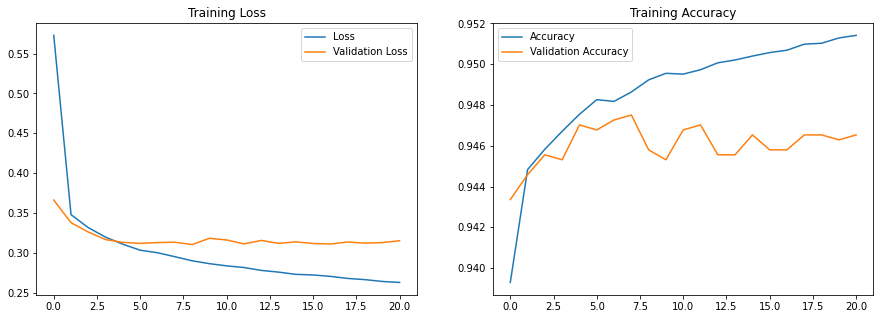

In [ ]:
# Recupero il log di addestramento
df_history = pd.read_json(log_history, lines=True)

# visualizzazione andamento addestramento
# su un grafico composto da due sub-plot
# uno per il loss, l'altro per l'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Errore durante l'addestramento
ax1.plot(df_history['loss'], label='Loss')
ax1.plot(df_history['val_loss'], label='Validation Loss')
ax1.set_title('Training Loss')
ax1.legend()

# Accuratezza durante l'addestramento
ax2.plot(df_history['sparse_categorical_accuracy'], label='Accuracy')
ax2.plot(df_history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training Accuracy')
ax2.legend()

plt.show()

## Test del modello
La seguente cella permette di caricare l'ultimo checkpoint dell'addestramento
precedentemente salvato.

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [ ]:
class Translate:
  def __init__(self, transformer_block, tokenizers, tokenizer_bert):
    self.transformer = transformer_block
    self.tokenizers = tokenizers
    self.tokenizer_bert = tokenizer_bert

  def predict(self, input_text, max_length):
    if input_text is None:
      input_text = input_data[np.random.choice(len(input_data))]
      print(input_text)

    inputs_bert = self.tokenizer_bert(input_text)

    start_end = self.tokenizers.it.tokenize([''])[0]
    start = start_end[0][tf.newaxis]
    end = (start_end[1][tf.newaxis]).numpy()[0]

    output_array = tf.TensorArray(dtype=tf.int64, size=max_length, dynamic_size=True)
    output_array = output_array.write(0, start)     

    out_words = []

    for i in tf.range(max_length):
      # decodifica e recupero probabilità di output
      output = tf.transpose(output_array.stack())
      
      transformer_output = transformer([inputs_bert, output], 
                                        training=False,
                                        debug=False)

      predictions = transformer_output[:, -1:, :]

      # selezione della parola più probabile
      predict = tf.argmax(predictions, -1)
      pred_values = (K.argmax(transformer_output, axis=-1)).numpy()
    
      # inserimento della parola nella sequenza di output
      output_array = output_array.write(i+1, [pred_values[0][i]])

      if pred_values[0][i] == end:
        break

    output = tf.transpose(output_array.stack())
    text = tokenizers.it.detokenize(output)[0]  

    tokens = tokenizers.it.lookup(output)[0]

    return text, tokens

In [ ]:
test_sequences = [test_input_data[1], test_input_data[33], test_input_data[10], 
                  test_input_data[57], test_input_data[62], test_input_data[15], 
                  test_input_data[4], test_input_data[42]]

translate = Translate(transformer_block=transformer,
                      tokenizers=tokenizers,
                      tokenizer_bert=tokenizer_encoder)

for test_sequence in test_sequences:
  text, token = translate.predict(tf.constant([test_sequence]), MAX_SEQ_LENGTH)

  print(f'{"Input:":15s}: {test_sequence}')
  print(f'{"Prediction":15s}: {text.numpy().decode("utf-8")}')  
  # print(f'tokens : {token}')
  # print(target_data[41])
  # break
  print('---------------------------------------------')

print(test_target_data[1])
print(test_target_data[33])
print(test_target_data[10])
print(test_target_data[57])
print(test_target_data[62])
print(test_target_data[15])
print(test_target_data[4])
print(test_target_data[42])

Input:         : You are my life.
Prediction     : lui e stato a casa .
---------------------------------------------
Input:         : I trained my dog to bring me the newspaper in the morning.
Prediction     : lui e stato a tennis con il suo padre .
---------------------------------------------
Input:         : I'm a doctor.
Prediction     : lui e stato a tennis con il suo padre .
---------------------------------------------
Input:         : He has been well off since he started this job.
Prediction     : lui e stato a tennis con il suo padre .
---------------------------------------------
Input:         : My brights are on.
Prediction     : lui e stato a casa .
---------------------------------------------
Input:         : Life is a flame that death extinguishes.
Prediction     : lui e un ' altra persona che e un ' altra persona e un ' altra persona e un ' altra persona e un ' altra persona e un ' altra persona che e un ' altra persona e stato punito .
------------------------------

## Tensorboard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
log_dir

In [ ]:
%tensorboard --logdir drive/MyDrive/BERT/logs/fit/20221026-134720